### Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Load Datasets 

In [2]:
# Load the dataset
train_path = 'train.csv' 
test_path = 'test.csv'  
sample_submission_path = 'sample_submission.csv'  

In [3]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_submission_path)

## Display Initial Data and Specify Required 

In [4]:
# Display the first few rows of the train and test dataset
train_data.head(), test_data.head()

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [5]:
#Displat the info of the training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Select the relevant features and target variable
features = ['LotArea', 'BedroomAbvGr', 'FullBath','BsmtFullBath','BsmtHalfBath']
target = 'SalePrice'

## Preprocessing

In [7]:
# Preprocessing

train_data = train_data.dropna(subset=features + [target])
test_data = test_data.dropna(subset=features)

## Setting Up Training and Testing Datasets 

In [8]:
# Separate features and target in the training data
X_train = train_data[features]
y_train = train_data[target]

# Test data features
X_test = test_data[features]

In [9]:
# Implement the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Training the Linear Regression Model

In [10]:
# Make predictions
y_pred = model.predict(X_test)

submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred})
submission.to_csv('model_submission.csv', index=False)

In [11]:
# Evaluate the model using the training set
train_pred = model.predict(X_train)
r2 = r2_score(y_train, train_pred)
mse = mean_squared_error(y_train, train_pred)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

R2 Score: 0.409396263472956
Mean Squared Error: 3724812903.9934063


## Display and Compare Model and Actual Results

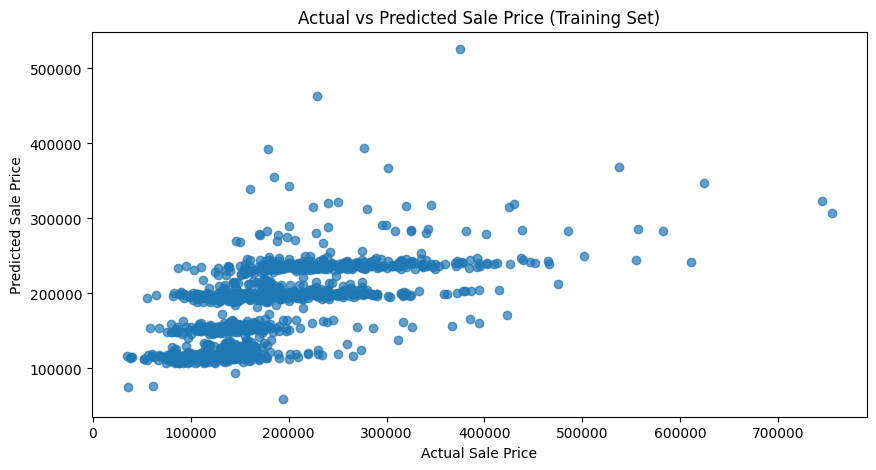

In [12]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, train_pred, alpha=0.7)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Training Set)')
plt.show()

## Compare and Display Model's Results with Benchmark

In [13]:
# Compare with the benchmark
benchmark = sample_submission.merge(test_data[['Id']], on='Id')['SalePrice']
benchmark_pred = submission['SalePrice']

benchmark_r2 = r2_score(benchmark, benchmark_pred)
benchmark_mse = mean_squared_error(benchmark, benchmark_pred)
print(f'Benchmark R2 Score: {benchmark_r2}')
print(f'Benchmark Mean Squared Error: {benchmark_mse}')


Benchmark R2 Score: -7.619403169383986
Benchmark Mean Squared Error: 2288588499.505641


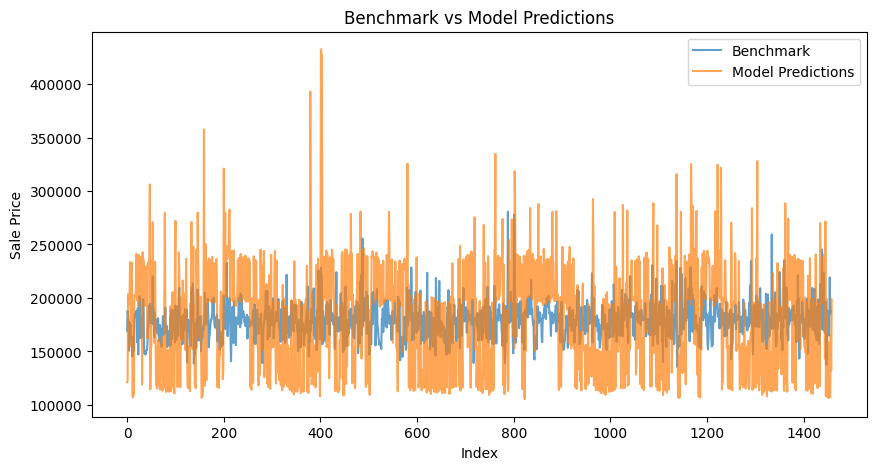

In [14]:
# Visualize the comparison
plt.figure(figsize=(10, 5))
plt.plot(benchmark, label='Benchmark', alpha=0.7)
plt.plot(benchmark_pred, label='Model Predictions', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Sale Price')
plt.title('Benchmark vs Model Predictions')
plt.legend()
plt.show()
